<a href="https://colab.research.google.com/github/melchilegion/Qwasar.io/blob/main/classically_punk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pip install wave
!pip install seaborn
!pip install json
!pip intall numpy
!pip install sklearn
!pip install tensorflow
!pip install matplotlib

import wave
import os
import seaborn as sb
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, BatchNormalization , Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import classification_report

ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json
ERROR: unknown command "intall" - maybe you meant "install"
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import os
import wave
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_waveform(path, num_rows=2, num_cols=5):
    folders = [folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]
    total_subplots = num_rows * num_cols
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 6))

    for i, folder in enumerate(folders):
        if i >= total_subplots:
            break

        folder_path = os.path.join(path, folder)
        audio_files = [file for file in os.listdir(folder_path) if file.endswith('.wav')]

        for j, file in enumerate(audio_files):
            print(file)
            if j >= num_cols:
                break

            file_path = os.path.join(folder_path, file)

            # Read the audio file using wave
            with wave.open(file_path, 'rb') as wav_file:
                sr = wav_file.getframerate()
                n_samples = wav_file.getnframes()
                audio = wav_file.readframes(n_samples)
                audio = np.frombuffer(audio, dtype=np.int16)  # Assuming 16-bit PCM

            row = i // num_cols
            col = j  # Use j for column index
            sns.lineplot(x=np.arange(n_samples) / sr, y=audio, ax=axs[row, col])
            axs[row, col].set_title(f'{folder}/{file}')

    plt.tight_layout()
    fig.suptitle("Waveforms")
    fig.subplots_adjust(top=0.90)
    plt.savefig('waveforms_for_audio_files.png', dpi=300)
    plt.show()

disco.00000.wav
disco.00011.wav
disco.00010.wav
disco.00009.wav
disco.00008.wav
disco.00007.wav
hiphop.00099.wav
hiphop.00000.wav
hiphop.00006.wav
hiphop.00001.wav
hiphop.00003.wav
hiphop.00004.wav
country.00003.wav
country.00002.wav
country.00001.wav
country.00000.wav
country.00010.wav
country.00009.wav
classical.00002.wav
classical.00001.wav
classical.00000.wav
classical.00009.wav
classical.00008.wav
classical.00007.wav
blues.00000.wav
blues.00006.wav
blues.00005.wav
blues.00004.wav
blues.00003.wav
blues.00002.wav
reggae.00002.wav
reggae.00006.wav
reggae.00007.wav
reggae.00000.wav
reggae.00010.wav
reggae.00009.wav
jazz.00007.wav
jazz.00000.wav
jazz.00008.wav
jazz.00006.wav
jazz.00001.wav
jazz.00005.wav
pop.00002.wav
pop.00003.wav
pop.00001.wav
pop.00000.wav
pop.00009.wav
pop.00005.wav
rock.00000.wav
rock.00002.wav
rock.00007.wav
rock.00008.wav
rock.00005.wav
rock.00004.wav
metal.00002.wav
metal.00001.wav
metal.00000.wav
metal.00003.wav
metal.00007.wav
metal.00005.wav


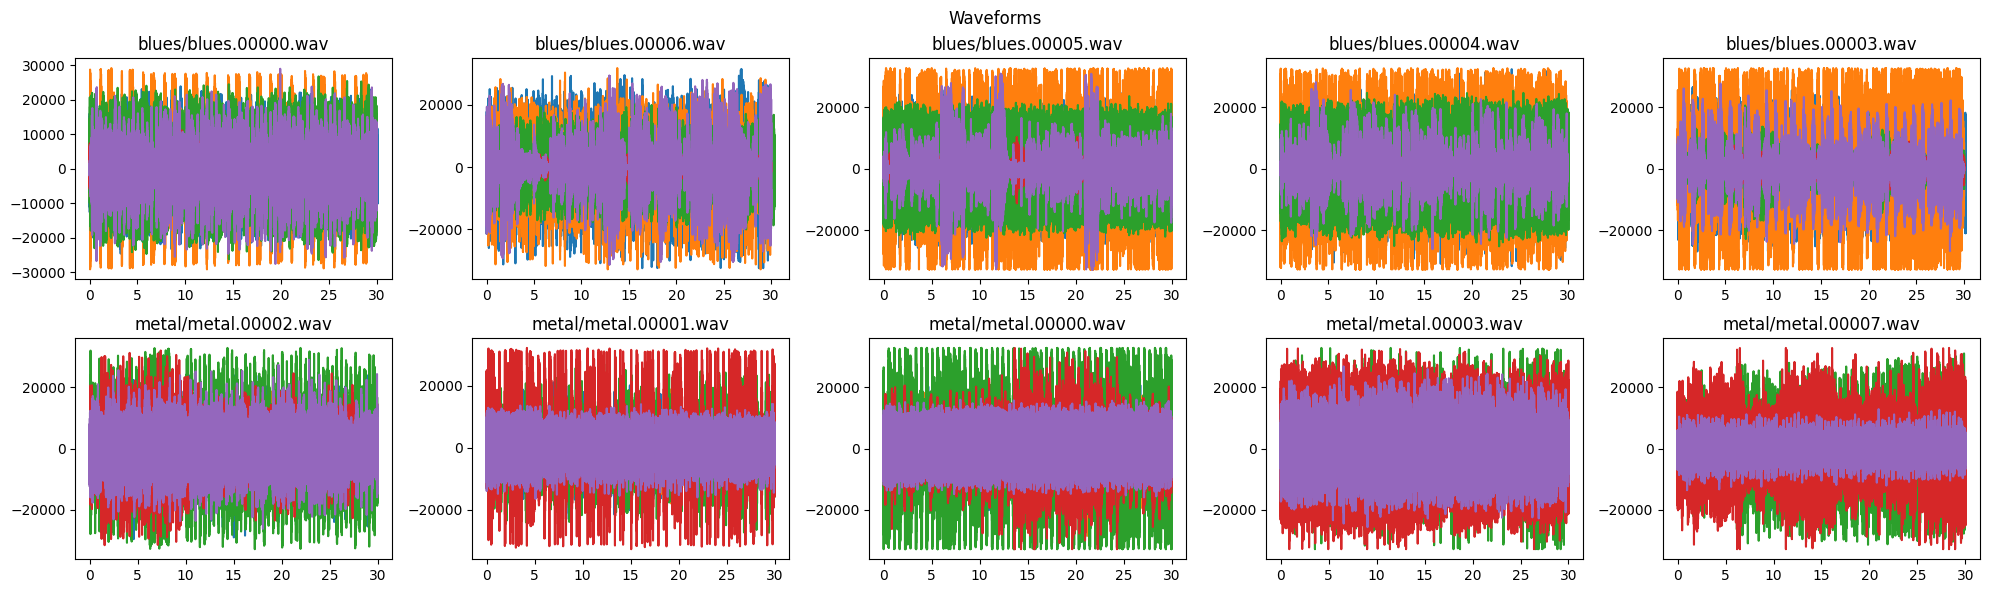

In [4]:
folder_path = "/content/drive/MyDrive/classically_punk_music_genres/genres"
plot_waveform(folder_path)

In [19]:
!pip install essentia
!pip install librosa

import os
import wave
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_waveform(path, num_rows=2, num_cols=5):
    folders = [folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]
    total_subplots = num_rows * num_cols
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 6))

    for i, folder in enumerate(folders):
        if i >= total_subplots:
            break

        #folder_path = os.path.join(path, folder)
        folder_path = "/content/drive/MyDrive/classically_punk_music_genres/genres"
        audio_files = [file for file in os.listdir(folder_path) if file.endswith('.wav')]

        for j, file in enumerate(audio_files):
            print(file)
            if j >= num_cols:
                break

            file_path = os.path.join(folder_path, file)

            # Read the audio file using wave
            with wave.open(file_path, 'rb') as wav_file:
                sr = wav_file.getframerate()
                n_samples = wav_file.getnframes()
                audio = wav_file.readframes(n_samples)
                audio = np.frombuffer(audio, dtype=np.int16)  # Assuming 16-bit PCM

            row = i // num_cols
            col = j  # Use j for column index
            sns.lineplot(x=np.arange(n_samples) / sr, y=audio, ax=axs[row, col])
            axs[row, col].set_title(f'{folder}/{file}')

    plt.tight_layout()
    fig.suptitle("Waveforms")
    fig.subplots_adjust(top=0.90)
    plt.savefig('waveforms_for_audio_files.png', dpi=300)
    plt.show()

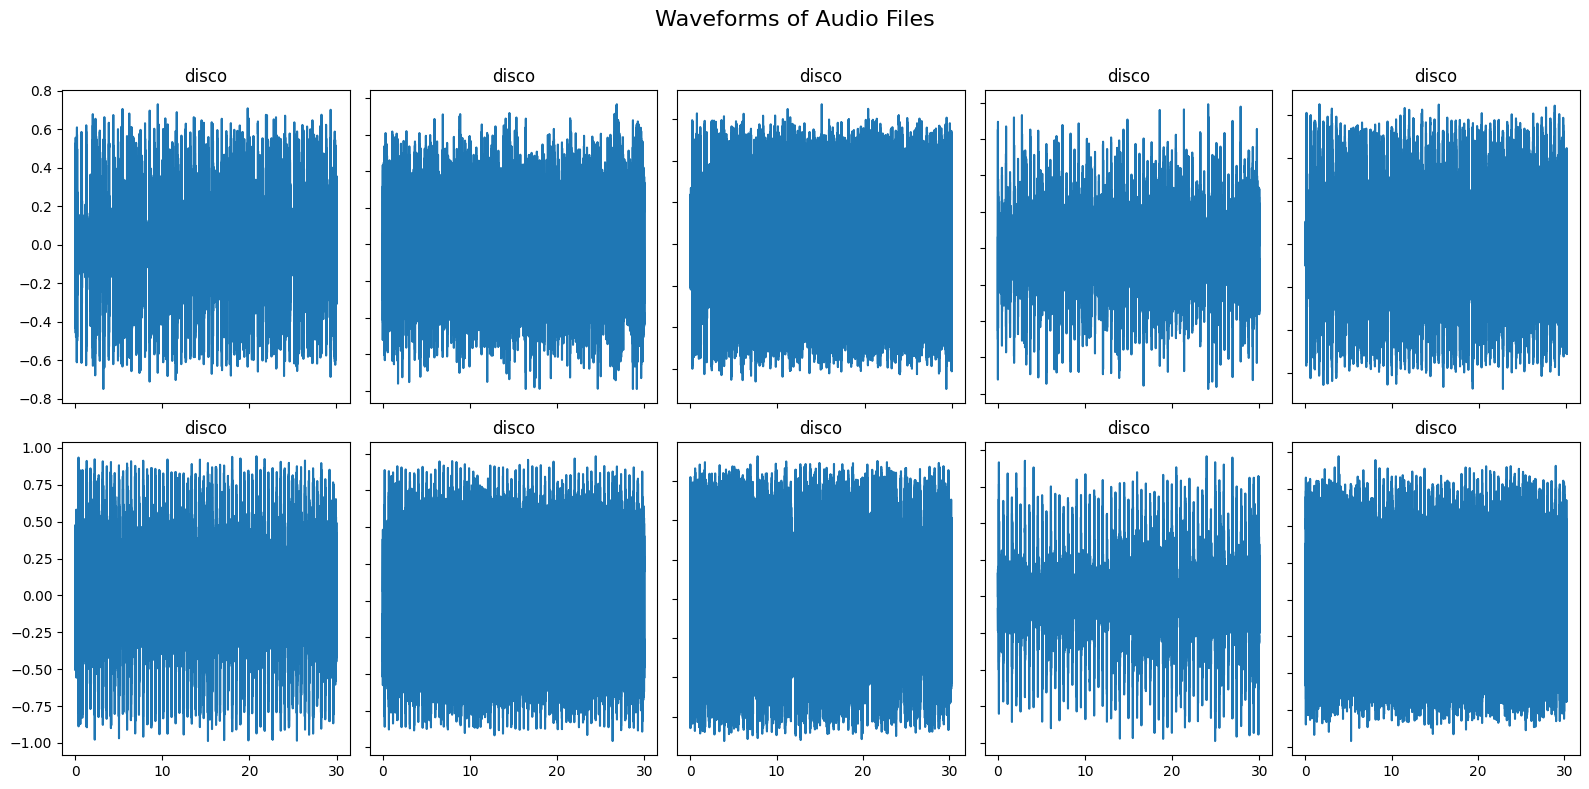

In [23]:
import os
import librosa
import matplotlib.pyplot as plt
import numpy as np

def plot_waveform(directory_path, num_rows=2, num_cols=5):
    # Get a list of folders in the given directory
    folders = [folder for folder in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder))]

    # Initialize the figure and axes for subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 8))
    subplot_idx = 0

    for folder in folders:
        folder_path = os.path.join(directory_path, folder)
        audio_files = [file for file in os.listdir(folder_path) if file.endswith('.wav')]

        for file in audio_files:
            if subplot_idx >= num_rows * num_cols:
                break  # Stop if we reach the maximum number of subplots

            # Load the audio file
            file_path = os.path.join(folder_path, file)
            audio, sr = librosa.load(file_path, sr=None)

            # Determine the row and column in the subplot grid
            row, col = divmod(subplot_idx, num_cols)

            # Plot the waveform
            axs[row, col].plot(np.linspace(0, len(audio) / sr, num=len(audio)), audio)
            axs[row, col].set_title(folder)
            axs[row, col].label_outer()  # Hide x and y labels if not at the border

            subplot_idx += 1

    # Adjust the layout and add a title
    plt.tight_layout()
    fig.suptitle("Waveforms of Audio Files", fontsize=16)
    plt.subplots_adjust(top=0.88)

    # Save and show the figure
    plt.savefig('waveforms_grid.png', dpi=300)
    plt.show()

# Example usage
plot_waveform('/content/drive/MyDrive/classically_punk_music_genres/genres')

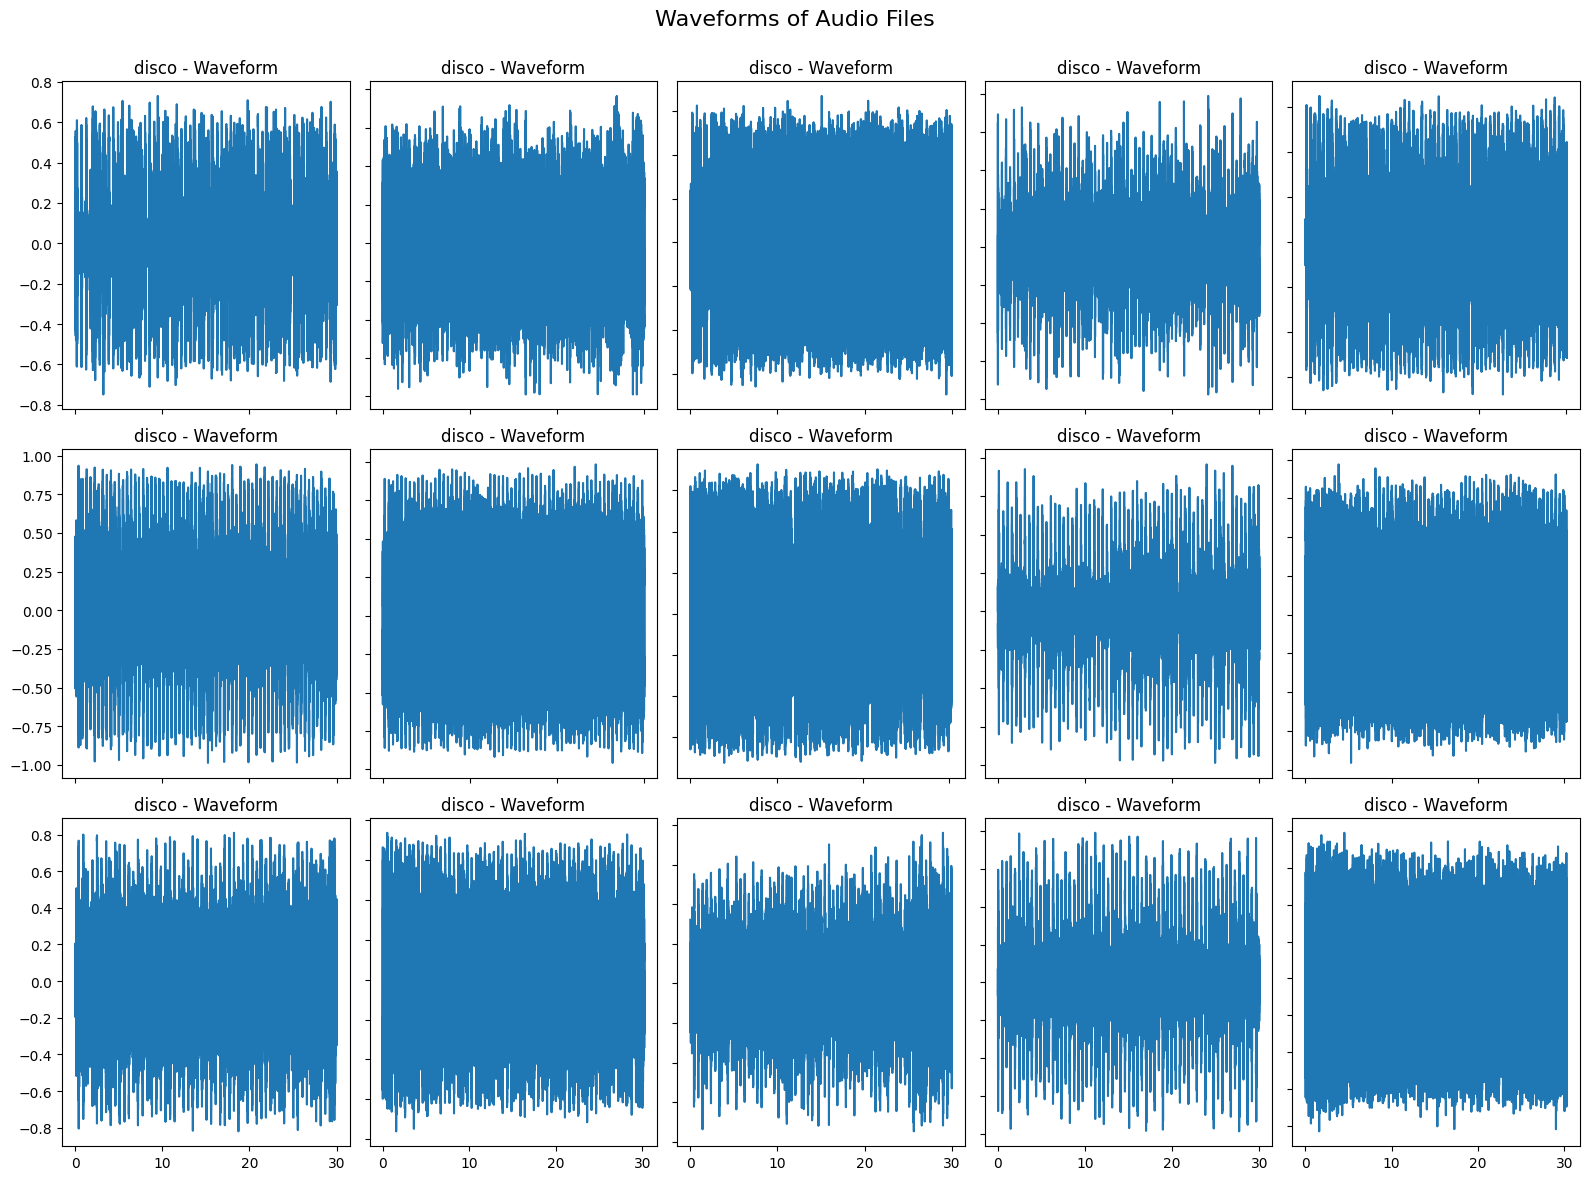

In [24]:
import os
import librosa
import matplotlib.pyplot as plt
import numpy as np

def plot_audio_features(directory_path, num_rows=3, num_cols=5):
    # Get a list of folders in the given directory
    folders = [folder for folder in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder))]

    # Initialize the figure and axes for subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 12))
    subplot_idx = 0

    for folder in folders:
        folder_path = os.path.join(directory_path, folder)
        audio_files = [file for file in os.listdir(folder_path) if file.endswith('.wav')]

        for file in audio_files:
            if subplot_idx >= num_rows * num_cols:
                break  # Stop if we reach the maximum number of subplots

            # Load the audio file
            file_path = os.path.join(folder_path, file)
            audio, sr = librosa.load(file_path, sr=None)

            # Determine the row and column in the subplot grid
            row, col = divmod(subplot_idx, num_cols)

            # Plot the waveform
            axs[row, col].plot(np.linspace(0, len(audio) / sr, num=len(audio)), audio)
            axs[row, col].set_title(f"{folder} - Waveform")
            axs[row, col].label_outer()  # Hide x and y labels if not at the border

            subplot_idx += 1

    # Adjust the layout and add a title
    plt.tight_layout()
    fig.suptitle("Waveforms of Audio Files", fontsize=16)
    plt.subplots_adjust(top=0.92)

    # Save and show the figure
    plt.savefig('audio_waveforms_grid.png', dpi=300)
    plt.show()

# Example usage
plot_audio_features('/content/drive/MyDrive/classically_punk_music_genres/genres')